## Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

- https://keras.io/api/data_loading/image/

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x, y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[154.75 146.75 143.75]
   [156.25 148.25 145.25]
   [157.25 149.25 146.25]
   ...
   [139.75 132.75 126.75]
   [140.75 133.75 127.75]
   [131.25 124.25 118.25]]

  [[158.25 150.25 147.25]
   [156.   148.   145.  ]
   [155.5  147.5  144.5 ]
   ...
   [135.75 128.75 122.75]
   [127.75 120.75 114.75]
   [140.25 133.25 127.25]]

  [[154.75 146.75 143.75]
   [159.25 151.25 148.25]
   [147.5  139.5  136.5 ]
   ...
   [139.   132.   126.  ]
   [139.   132.   126.  ]
   [139.25 132.25 126.25]]

  ...

  [[131.75 121.75 119.75]
   [131.5  121.5  119.5 ]
   [138.25 128.25 126.25]
   ...
   [116.   105.   101.  ]
   [116.5  105.5  101.5 ]
   [119.   108.   104.  ]]

  [[149.5  139.5  137.5 ]
   [136.25 126.25 124.25]
   [138.25 128.25 126.25]
   ...
   [113.5  102.5   98.5 ]
   [125.   114.   110.  ]
   [124.25 113.25 109.25]]

  [[152.25 142.25 140.25]
   [143.5  133.5  131.5 ]
   [146.25 136.25 134.25]
   ...
   [114.75 103.75  99.75]
   [121.   110.   106.  ]
   [123.   112.   10

### Building Model

### To Avoid Overshooting
- Choose small learning rate default 0.001 we are taking 0.0001
- There may be chance of underfitting, so increase number of neuron
- Add more convolution layer to extract more feature from image there may be possibility that model unable to capture relevant feature or model is confusing dur to lack of feature so feed with more feature.

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

#### Building Convolution Layer

In [8]:
# kernerl size = 3 (3*3 matrix)

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

C:\Users\parth\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Dropout(0.25))  # To avoid overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500, activation='relu'))

In [16]:
model.add(Dropout(0.4))   # To avoid overfitting

In [17]:
# Output Layer
model.add(Dense(units=38, activation='softmax'))

### Compiling Model

In [18]:
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam - copy first 2 lines of code instead of adam to decrease laerning rate

model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [20]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3810s 2s/step - accuracy: 0.3985 - loss: 2.1226 - val_accuracy: 0.8277 - val_loss: 0.5350
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3763s 2s/step - accuracy: 0.8374 - loss: 0.5178 - val_accuracy: 0.9141 - val_loss: 0.2723
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4001s 2s/step - accuracy: 0.9078 - loss: 0.2855 - val_accuracy: 0.9398 - val_loss: 0.1908
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6461s 3s/step - accuracy: 0.9377 - loss: 0.1926 - val_accuracy: 0.9490 - val_loss: 0.1662
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4109s 2s/step - accuracy: 0.9520 - loss: 0.1462 - val_accuracy: 0.9548 - val_loss: 0.1394
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4410s 2s/step - accuracy: 0.9622 - loss: 0.1171 - val_accuracy: 0.9328 - val_loss: 0.2203
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4091s 2s/step - accuracy: 0.9698 - loss: 0.0935 - val_accuracy: 0.9524 - val_loss: 0.1639
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3954s 2s/step - accuracy: 0.9738 -

# Model Evaluation

In [21]:
# Model Evaluation on Training set

train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 843s 384ms/step - accuracy: 0.9862 - loss: 0.0431


In [22]:
print(train_loss, train_acc)

0.03812543675303459 0.9877516031265259


In [23]:
# Model on validation set

val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 209s 380ms/step - accuracy: 0.9621 - loss: 0.1284


In [24]:
print(val_loss, val_acc)

0.13449037075042725 0.9601638913154602


# Saving Model

In [25]:
# we can save model by .h5 extension as well as .keras extension
# .h5 = more size
# .keras = less size

model.save("trained_model.h5")

In [26]:
model.save("trained_model.keras")

In [27]:
training_history.history

{'accuracy': [0.6010384559631348,
  0.8615548610687256,
  0.9175617098808289,
  0.9430400729179382,
  0.956867516040802,
  0.9645494222640991,
  0.972003698348999,
  0.9766412973403931,
  0.978988528251648,
  0.9816487431526184],
 'loss': [1.3498116731643677,
  0.43769708275794983,
  0.25309300422668457,
  0.17355921864509583,
  0.13144470751285553,
  0.10911372303962708,
  0.08566613495349884,
  0.07106638699769974,
  0.06394269317388535,
  0.05689471960067749],
 'val_accuracy': [0.8276804089546204,
  0.9140678644180298,
  0.939847469329834,
  0.948952853679657,
  0.954757571220398,
  0.9327908158302307,
  0.9524242877960205,
  0.9650011658668518,
  0.954871416091919,
  0.9601638913154602],
 'val_loss': [0.5350277423858643,
  0.2722955644130707,
  0.19080156087875366,
  0.16616211831569672,
  0.13936462998390198,
  0.22033382952213287,
  0.1639399230480194,
  0.11365529894828796,
  0.16320809721946716,
  0.13449044525623322]}

In [28]:
# Recording history in json

import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

# Accuracy Visulization

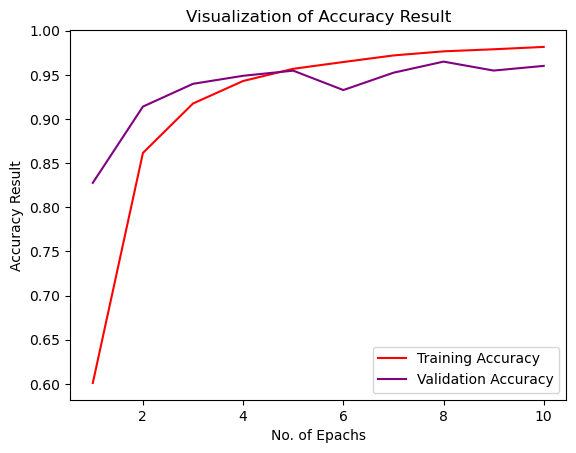

In [34]:
epachs = [i for i in range(1, 11)]
plt.plot(epachs, training_history.history['accuracy'], color='red', label="Training Accuracy")
plt.plot(epachs, training_history.history['val_accuracy'], color='purple', label="Validation Accuracy")
plt.xlabel("No. of Epachs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

# Some other matrics for model evaluation

In [35]:
class_name = validation_set.class_names

In [36]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [38]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 222s 402ms/step


(array([[1.00000000e+00, 5.75594572e-10, 2.67072892e-11, ...,
         2.13388693e-17, 8.59564906e-16, 2.76447181e-15],
        [9.99995470e-01, 7.13000270e-10, 2.51668308e-09, ...,
         1.28774392e-13, 3.81935098e-13, 8.06224729e-14],
        [1.00000000e+00, 5.68439393e-11, 1.07053019e-10, ...,
         2.23907684e-17, 7.87578381e-16, 1.67266815e-14],
        ...,
        [1.99543223e-07, 1.63551089e-10, 6.67756353e-07, ...,
         2.94785735e-07, 4.64671714e-08, 9.99204695e-01],
        [3.06026121e-10, 8.88942579e-14, 1.78533077e-10, ...,
         5.66220126e-10, 9.36924358e-11, 9.99999762e-01],
        [3.93606554e-15, 8.84741001e-17, 1.17517715e-14, ...,
         3.03106336e-14, 4.68233633e-13, 9.99999523e-01]], dtype=float32),
 (17572, 38))

In [39]:
# axis = 1 (vertically)
# axis = 0 (horizontally)

predicted_categories = tf.argmax(y_pred, axis=1)

In [40]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [43]:
# Assuming test_set is an iterable that yields tuples of (x, y)
# Convert the generator to a list of tensors
true_categories_list = [y for x, y in test_set]

# Concatenate the list of tensors
true_categories = tf.concat(true_categories_list, axis=0)

true_categories


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [45]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

**Calculate of precision recall**

To calculate precision and recall in a TensorFlow or Keras context, you typically use the model's predictions and the true labels. Here’s a step-by-step approach:
- Get the predictions from your model.
- Concatenate the true labels and predictions if they are in batches.
- Compute precision and recall using TensorFlow functions            

In [ ]:
pip install pillow requests matplotlib

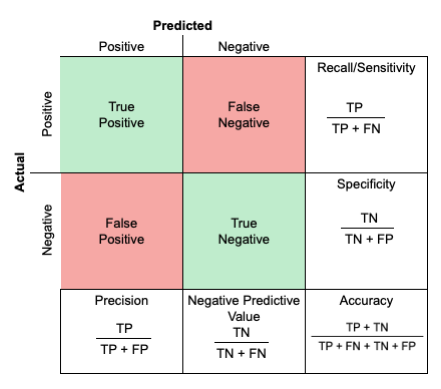

In [49]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL of the image
url = 'https://miro.medium.com/v2/resize:fit:842/1*LVilqC3cy4AgyC1wD4RH-A.png'

# Fetch the image
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the image using PIL
img.show()

# Optionally, display the image using matplotlib (useful for Jupyter notebooks)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


In [50]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

from sklearn.metrics import classification_report

In [52]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.98      0.95       504
                                 Apple___Black_rot       1.00      0.93      0.96       497
                          Apple___Cedar_apple_rust       0.93      0.99      0.96       440
                                   Apple___healthy       0.98      0.93      0.95       502
                               Blueberry___healthy       0.98      0.95      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.92      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.92      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

**F Score**

F score = 2/(1/precision + 1/Recall)

F score = (2*Precision*Recall)/Precision+Recall

In [55]:
from sklearn.metrics import confusion_matrix

In [58]:
cm = confusion_matrix(Y_true, predicted_categories)
print(cm)

[[495   1   0 ...   0   0   0]
 [ 12 460   0 ...   0   0   0]
 [  2   0 436 ...   0   0   0]
 ...
 [  0   0   1 ... 487   0   0]
 [  0   0   0 ...   0 444   0]
 [  0   0   1 ...   0   0 471]]


## Confusion Matrix Visualization

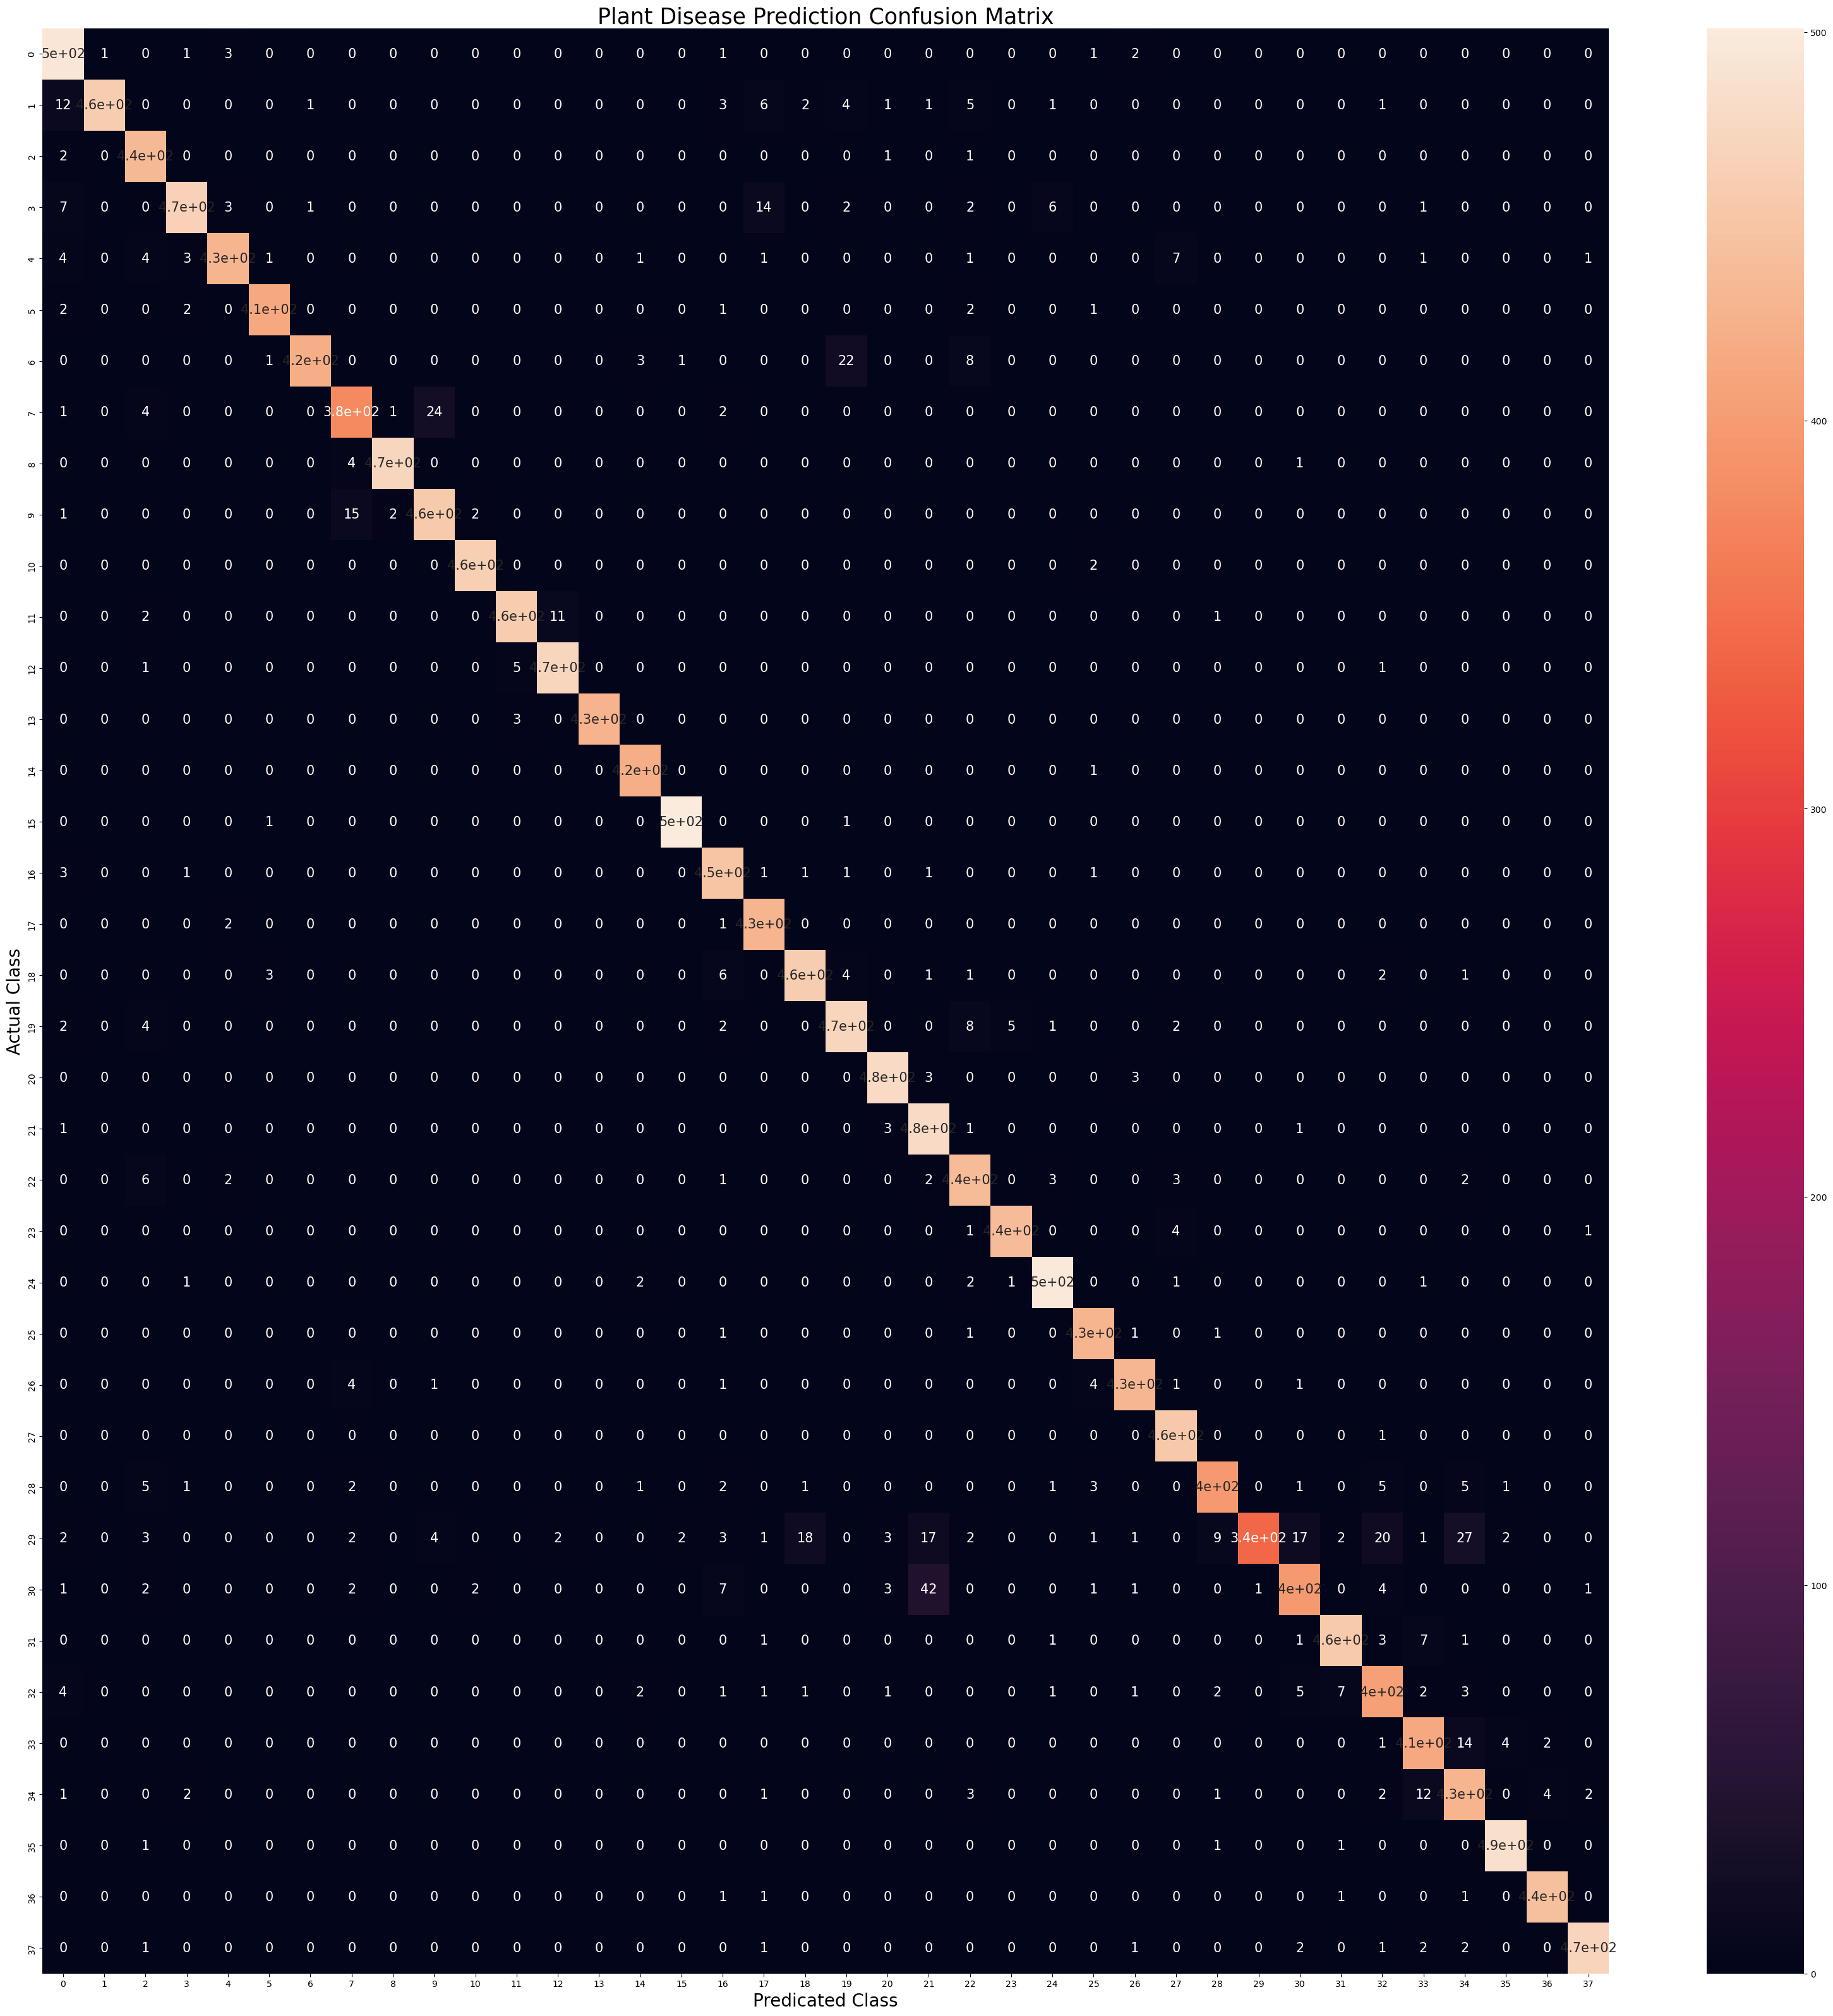

In [68]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={'size':15})
plt.xlabel("Predicated Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()